# Learning about spatial data and maps for archaeology (and other things)

### Spatial Thinking and Skills Exercise 1 for Theory and Practice

#### Made by Rachel Opitz, Archaeology, University of Glasgow



Remote sensing data, from satellite images, to lidar, to multispectral data, is used in archaeology to identify sites and features throughout the landscape. Recently, hyperspectral data - which is like multispectral data but with even more and narrower bands - has been used to spot cropmarks before they appear in the visible spectrum and are apparent to the naked eye. 

The aim of this exercise is for you to:
* learn to work with spectral images, including extracting individual bands and calculating common band ratios
* learn which bands and ratios are frequently used to spot vegetation stress aka cropmarks
* start thinking about the use of remote sensing in archaeological survey and landscape studies

You'll do this using data collected over Carnuntum, a Roman site in Austira, made available by the LBI. 

As you may recall from Archaeology of Scotland, to start working with spatial data and imagery, you need to put together your toolkit. You're currently working inside something called a jupyter notebook. It's a place to keep notes, pictures, code and maps together. You can add tools and data into your jupyter notebook and then use them to ask spatial questions and make maps and visualisations that help answer those questions. 


### Let's get started... Hit 'Ctrl'+'Enter' to run the code in any cell in the page.

In [60]:
%matplotlib inline

from osgeo import gdal
import gdal; gdal.UseExceptions()
import rasterio as rasterio
from matplotlib import pyplot
import numpy as np
import pygeoprocessing
from skimage import data, io, filters
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings('ignore')

In [7]:
# First we want to know a little about our dataset. 
# How many bands does our image have? Let's count them.

dataset = rasterio.open('http://ropitz.github.io/digitalantiquity/data/carnuntum.tif')

dataset.count



65

### 65 bands is a lot! Now we want to know which wavelength is stored in each band.
### Get the information about which wavelength is in each band from the files header.

[The header info is here.](http://ropitz.github.io/digitalantiquity/data/carnuntum.txt) You may want to keep it open in another tab for easy reference.


In [56]:
#I pre-extracted the most commonly used and important bands into their own raster images. 
# Rasters are just fancy images.
# We'll assign RGB + IR to their own variables so we can work with them.
RED = 'data/red.tif'
GREEN = 'data/green.tif'
BLUE = 'data/blue.tif'
IR = 'data/IR.tif'
ALL = 'data/carnuntum.tif'

In [49]:
nir_ds = gdal.Open('data/IR.tif')

nir_ds.GetRasterBand(1)

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7fba33eb2f30> >

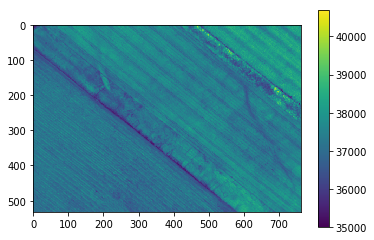

In [65]:
 # You can open and plot each raster.
nir_ds = gdal.Open(IR)
nir_band = nir_ds.GetRasterBand(1)
nir = nir_band.ReadAsArray()
plt.imshow(nir)
plt.colorbar()

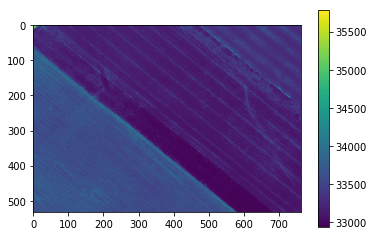

In [63]:
red_ds = gdal.Open(RED)
red_band = red_ds.GetRasterBand(1)
red = red_band.ReadAsArray()
plt.imshow(red)
plt.colorbar()

## Calculating Spectral Indices

To make cropmarks more visible we calculate different indices. Indices are combinations of spectral bands that highlight certain properties of the vegetation or soil. NDVI is one of the most common indices, and highlights the amount of clorophyll, which roughly corresponds to how healthy or stressed a plant is. 
[Spectral Indices that enhance the appearance of cropmarks (and other indices) can be found here.](https://www.indexdatabase.de/db/i-single.php?id=0)

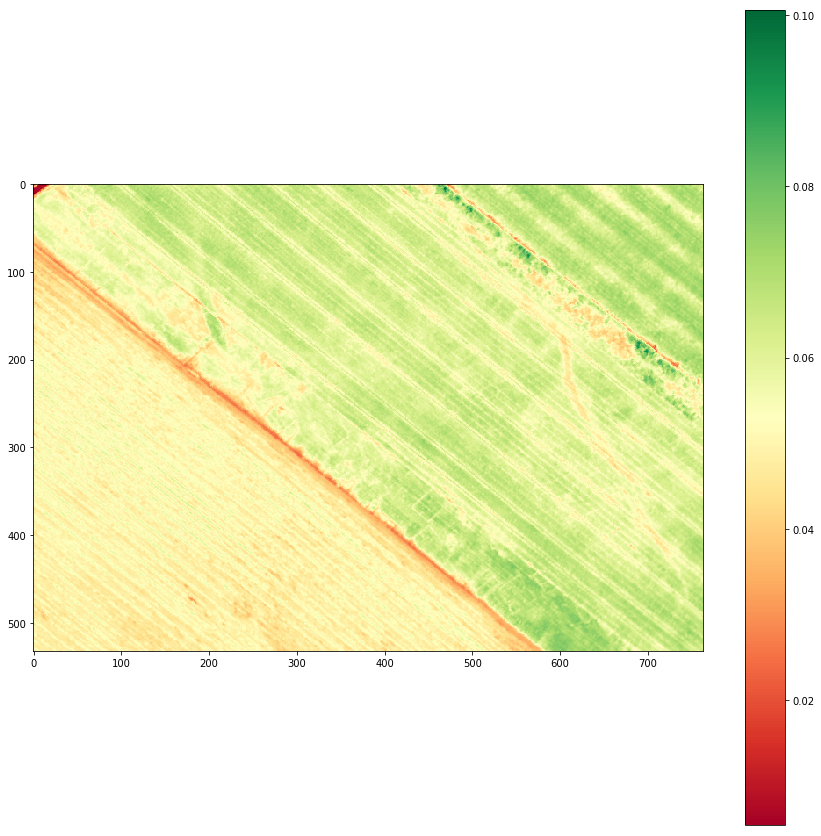

In [66]:
#Let's start by calculating NDVI
def ndvi(red, nir):
    """Calculate NDVI."""
    return (nir - red) / (nir + red)


red = red.astype(np.float64)
nir = nir.astype(np.float64)
fig = plt.figure(figsize=(15,15))
ndvi = ndvi(red, nir)
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()

Compare the NDVI image to the images of individual bands. Can you see more features in one than another? Different features? 

We can also create our own custom ratios by reading individual bands out of our big Carnuntum dataset and combining them in different ways. This is a good way to experiment and explore our data.

In [67]:
# Read out band 44
band44 = dataset.read((44))
band44

array([[36315, 36161, 36731, ..., 37971, 38070, 38012],
       [36194, 36181, 36967, ..., 37979, 37873, 37758],
       [36475, 36557, 36298, ..., 37850, 37909, 37946],
       ...,
       [37321, 37244, 37151, ..., 37739, 37549, 37460],
       [37136, 37299, 37395, ..., 37545, 37722, 37635],
       [37056, 37071, 37259, ..., 37462, 37652, 37615]], dtype=uint16)

In [68]:
# Read out band 16
band16 = dataset.read((16))
band16

array([[34206, 34129, 34047, ..., 33682, 33704, 33784],
       [34222, 34178, 34037, ..., 33708, 33727, 33744],
       [34038, 34011, 34337, ..., 33659, 33732, 33748],
       ...,
       [33852, 33844, 33793, ..., 33299, 33326, 33330],
       [33810, 33839, 33848, ..., 33293, 33317, 33321],
       [33835, 33819, 33834, ..., 33302, 33308, 33313]], dtype=uint16)

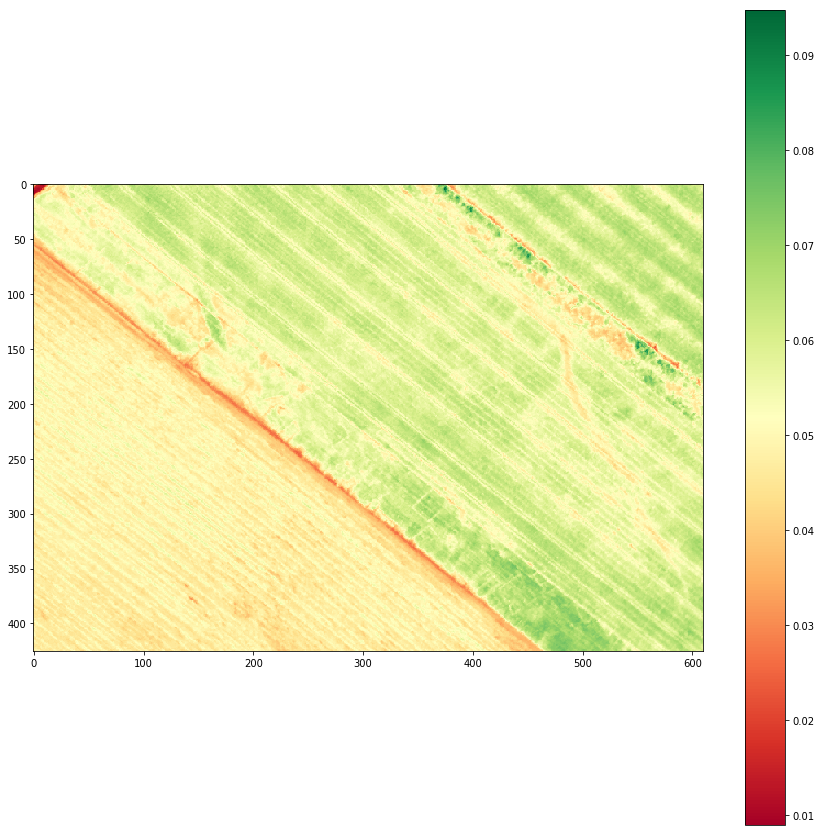

In [69]:
# Now we make a custom ratio, like NDVI but with different bands.
def ratio1(band44, band16):
    """Calculate custom ratio"""
    return (band44 - band16) / (band44 + band16)


band44 = band44.astype(np.float64)
band16 = band16.astype(np.float64)
fig = plt.figure(figsize=(15,15))
ratio1 = ratio1(band44, band16)
plt.imshow(ratio1, cmap='RdYlGn')
plt.colorbar()

In [70]:
#Let's try it with some other bands
band60 = dataset.read((60))
band60

array([[36721, 36582, 37093, ..., 37957, 38012, 37904],
       [36644, 36606, 37131, ..., 37921, 37867, 37753],
       [36747, 36813, 36510, ..., 37949, 37722, 37913],
       ...,
       [38037, 37893, 37683, ..., 37688, 37666, 37540],
       [37699, 37846, 38059, ..., 37510, 37695, 37645],
       [37632, 37728, 37947, ..., 37464, 37709, 37656]], dtype=uint16)

In [71]:
band30 = dataset.read((30))
band30

array([[34483, 34395, 34135, ..., 33227, 33240, 33341],
       [34543, 34468, 33941, ..., 33258, 33292, 33325],
       [34109, 33970, 34520, ..., 33212, 33285, 33278],
       ...,
       [33546, 33565, 33528, ..., 33078, 33096, 33106],
       [33546, 33567, 33582, ..., 33080, 33084, 33087],
       [33596, 33580, 33580, ..., 33089, 33085, 33075]], dtype=uint16)

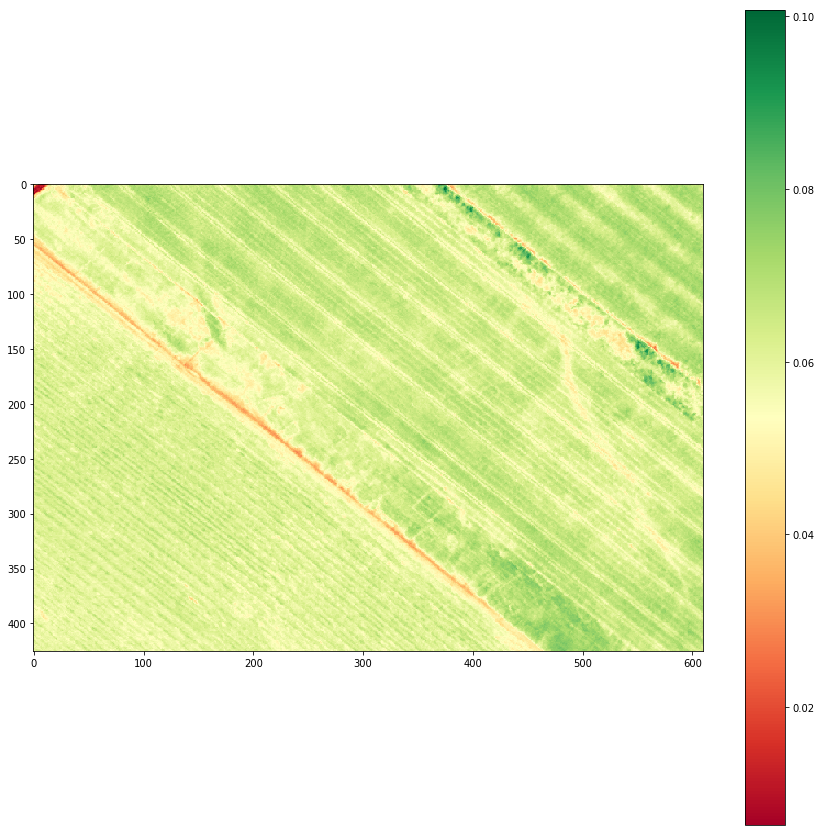

In [72]:
def ratio2(band60, band30):
    """Calculate custom ratio"""
    return (band60 - band30) / (band60 + band30)


band60 = band60.astype(np.float64)
band30 = band30.astype(np.float64)
fig = plt.figure(figsize=(15,15))
ratio2 = ratio2(band60, band30)
plt.imshow(ratio2, cmap='RdYlGn')
plt.colorbar()



Compare the results. Are some band combinations more effective at showing cropmarks than others?

In [73]:
#REIP is another popular index for highlighting cropmarks. Calculate REIP
b30 = dataset.read((30))
b35 = dataset.read((35))
b39 = dataset.read((39))
b42 = dataset.read((42))
b30 = b30.astype(np.float64)
b35 = b35.astype(np.float64)
b39 = b39.astype(np.float64)
b42 = b42.astype(np.float64)



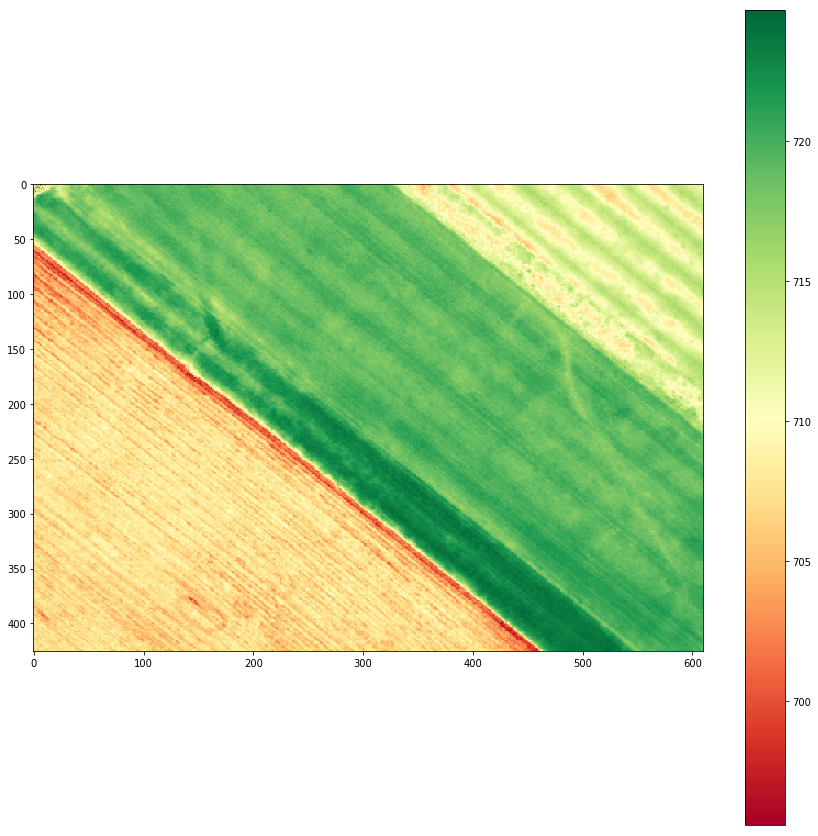

In [76]:
REIP = 700 + 40 * ((((b30 + b42)/2)-b35) / (b39 - b35))



REIPplot = 700 + (40 * ((((b30 + b42)/2)-b35) / (b39 - b35)))
fig = plt.figure(figsize=(15,15))
plt.imshow(REIPplot, cmap='RdYlGn')
plt.colorbar()

I don't think that index shows very much in our data. Let's look up [Another REIP Index](https://www.indexdatabase.de/db/i-single.php?id=190) and try that instead.

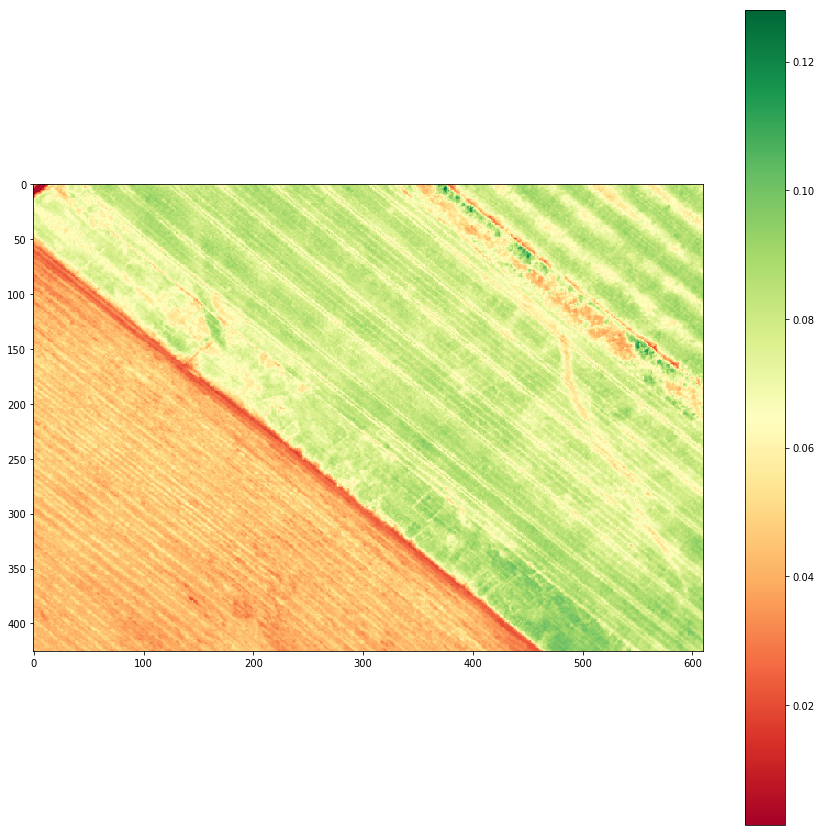

In [77]:
REIPCL = (b39/b35)-1
fig = plt.figure(figsize=(15,15))
plt.imshow(REIPCL, cmap='RdYlGn')
plt.colorbar()

That shows rather more!

### That concludes this tutorial.

Hopefully you have:
* learned to work with spectral images, including extracting individual bands and calculating common band ratios
* learned which bands and ratios are frequently used to spot vegetation stress aka cropmarks
* started thinking about the use of remote sensing in archaeological survey and landscape studies

We'll be talking more about remote sensing methods in archaeology throughout the course.